# 导入+数据预处理

导入数据，处理时间格式

In [1]:
import pandas as pd
import datetime

df = pd.read_csv('corporate_issuance.csv')
df['carrydate'] = pd.to_datetime(df['carrydate'], format="%d%b%Y")
df['maturitydate'] = pd.to_datetime(df['maturitydate'], format="%d%b%Y")
df['redemption_beginning'] = pd.to_datetime(df['redemption_beginning'], format="%d%b%Y")
df.head()

,code,carrydate,maturitydate,redemption_beginning,term,interestfrequency,Name,issuer_actual,issueamount,interesttype,...,multimktornot,creditrating,issuer_rating,interestacc,currency,listdate,endcarrydate,summunicipal,municipal,soe
0,127933.SH,2020-09-10,2050-09-10,2050-09-10,30.0,1,20铁道08,中国国家铁路集团有限公司,5.000000e+09,固定利率,...,是,AAA,AAA,A/365,CNY,14sep2020,09sep2050,1,0,1
1,2080251.IB,2020-09-10,2050-09-10,2050-09-10,30.0,1,20铁道08,中国国家铁路集团有限公司,5.000000e+09,固定利率,...,是,AAA,AAA,ACT/ACT,CNY,14sep2020,09sep2050,1,0,1
2,2280466.IB,2022-11-10,2052-11-10,2052-11-10,30.0,1,22铁道17,中国国家铁路集团有限公司,8.000000e+09,固定利率,...,是,AAA,AAA,ACT/ACT,CNY,14nov2022,09nov2052,1,0,1
3,102704.IB,2010-09-20,2040-09-20,2040-09-20,30.0,1,10汇金04,中央汇金投资有限责任公司,2.500000e+10,固定利率,...,否,-,NaN,ACT/ACT,CNY,25sep2010,19sep2040,0,0,1
4,1680449.IB,2016-11-09,2046-11-09,2046-11-09,30.0,1,16铁道10,中国国家铁路集团有限公司,5.000000e+09,固定利率,...,否,AAA,AAA,ACT/ACT,CNY,11nov2016,08nov2046,1,0,1


# 统计货币种类

In [2]:
df['currency'].value_counts()

currency
CNY    73610
USD        3
Name: count, dtype: int64

# 处理issuer_actual,如果有逗号就只取第一个公司名称

并且去掉美元债

In [3]:
# 处理issuer_actual,如果有逗号就只取第一个公司名称
df['issuer_actual'] = df['issuer_actual'].apply(lambda x: x.split(',')[0] if ',' in x else x)
# 不考虑美元债
df = df[df['currency'] == 'CNY']
df.head()

,code,carrydate,maturitydate,redemption_beginning,term,interestfrequency,Name,issuer_actual,issueamount,interesttype,...,multimktornot,creditrating,issuer_rating,interestacc,currency,listdate,endcarrydate,summunicipal,municipal,soe
0,127933.SH,2020-09-10,2050-09-10,2050-09-10,30.0,1,20铁道08,中国国家铁路集团有限公司,5.000000e+09,固定利率,...,是,AAA,AAA,A/365,CNY,14sep2020,09sep2050,1,0,1
1,2080251.IB,2020-09-10,2050-09-10,2050-09-10,30.0,1,20铁道08,中国国家铁路集团有限公司,5.000000e+09,固定利率,...,是,AAA,AAA,ACT/ACT,CNY,14sep2020,09sep2050,1,0,1
2,2280466.IB,2022-11-10,2052-11-10,2052-11-10,30.0,1,22铁道17,中国国家铁路集团有限公司,8.000000e+09,固定利率,...,是,AAA,AAA,ACT/ACT,CNY,14nov2022,09nov2052,1,0,1
3,102704.IB,2010-09-20,2040-09-20,2040-09-20,30.0,1,10汇金04,中央汇金投资有限责任公司,2.500000e+10,固定利率,...,否,-,NaN,ACT/ACT,CNY,25sep2010,19sep2040,0,0,1
4,1680449.IB,2016-11-09,2046-11-09,2046-11-09,30.0,1,16铁道10,中国国家铁路集团有限公司,5.000000e+09,固定利率,...,否,AAA,AAA,ACT/ACT,CNY,11nov2016,08nov2046,1,0,1


# 统计有多少发债公司

In [16]:
# 统计有多少个issuer
issuers = list(df['issuer_actual'].unique())
len(issuers)

7191

In [5]:
df['interesttype'].unique()

array(['固定利率', '累进利率', '浮动利率'], dtype=object)

In [6]:
# 只有单利，没有复利
df['paymenttype'].unique()

array(['单利'], dtype=object)

In [7]:
df[df['issuer_actual'] == '中国国家铁路集团有限公司'].head()

,code,carrydate,maturitydate,redemption_beginning,term,interestfrequency,Name,issuer_actual,issueamount,interesttype,...,multimktornot,creditrating,issuer_rating,interestacc,currency,listdate,endcarrydate,summunicipal,municipal,soe
0,127933.SH,2020-09-10,2050-09-10,2050-09-10,30.0,1,20铁道08,中国国家铁路集团有限公司,5.000000e+09,固定利率,...,是,AAA,AAA,A/365,CNY,14sep2020,09sep2050,1,0,1
1,2080251.IB,2020-09-10,2050-09-10,2050-09-10,30.0,1,20铁道08,中国国家铁路集团有限公司,5.000000e+09,固定利率,...,是,AAA,AAA,ACT/ACT,CNY,14sep2020,09sep2050,1,0,1
2,2280466.IB,2022-11-10,2052-11-10,2052-11-10,30.0,1,22铁道17,中国国家铁路集团有限公司,8.000000e+09,固定利率,...,是,AAA,AAA,ACT/ACT,CNY,14nov2022,09nov2052,1,0,1
4,1680449.IB,2016-11-09,2046-11-09,2046-11-09,30.0,1,16铁道10,中国国家铁路集团有限公司,5.000000e+09,固定利率,...,否,AAA,AAA,ACT/ACT,CNY,11nov2016,08nov2046,1,0,1
5,2180412.IB,2021-09-30,2051-09-30,2051-09-30,30.0,1,21铁道10,中国国家铁路集团有限公司,5.000000e+09,固定利率,...,是,AAA,AAA,ACT/ACT,CNY,11oct2021,29sep2051,1,0,1


In [8]:
max(df[df['issuer_actual'] == '中国国家铁路集团有限公司']['carrydate'])

Timestamp('2022-11-10 00:00:00')

In [9]:
min(df[df['issuer_actual'] == '中国国家铁路集团有限公司']['redemption_beginning'])

Timestamp('2000-01-20 00:00:00')

In [10]:
# 统计每个年份的发行量
df['year'] = df['carrydate'].dt.year
df['month'] = df['carrydate'].dt.month
df['day'] = df['carrydate'].dt.day
df['year'].value_counts().sort_index()

year
1994        1
1996        4
1997        8
1998       32
1999       48
2000       13
2001       11
2002       24
2003       31
2004       28
2005      144
2006      343
2007      363
2008      414
2009      769
2010      966
2011     1454
2012     2690
2013     2794
2014     4099
2015     5077
2016     6648
2017     4834
2018     5897
2019     7349
2020     9488
2021    10655
2022     9426
Name: count, dtype: int64

# 计算HHI

划定时间范围T为 2011/1 - 2022/11

按月份来划分时间节点，每个时间节点都是该月的最后一天，例如2011/1/31

一共划分5年，因此有5*12=60个时间节点

每个时间节点T_i都是观察时间节点，在每个观察时间节点计算未来f个时间节点的现金流，记为P_i, i=1,2,...,f

因此，只要到期时间大于这个时间节点，就只考虑付息，如果到期时间在这个时间节点和上一个时间节点之间，并且发行日期小于等于观察时间节点（防止未来信息泄露），就考虑付息和本金，如果到期时间小于等于上一个时间节点，就不考虑了

这样，每个时间节点T_i都有现金流P的时间序列，可以基于此计算每个观察时间节点的HHI

HHI的公式如下：

$HHI_i = \sum_{j=1}^{n} (\frac{P_{ij}}{\sum_{j=1}^{n} P_{ij}})^2$

至此，我们得到了一个面板数据，每一行是一个观察时间节点，每一列是公司，每个元素是该时间节点下该公司预期还债现金流的HHI

In [17]:
# 划定时间范围：2011/1 - 2022/11
# 按月份来划分时间节点，每个时间节点都是该月的最后一天，例如2011/1/31
# 因此，只要到期时间大于这个时间节点，就只考虑付息，如果到期时间在这个时间节点和上一个时间节点之间，就考虑付息和本金，如果到期时间小于等于上一个时间节点，就不考虑了

start = datetime.datetime(2011, 1, 31)
end = datetime.datetime(2022, 11, 30) # 改成11月
f = 10

# 新建一个dataframe，每一列都是一个issuer，每一行都是一个时间节点

time_nodes = pd.date_range(start, end, freq='M')
result_df = pd.DataFrame(index=time_nodes, columns=issuers)
# 新建一个列表，里面分别是'P_1', 'P_2', ..., 'P_f'
p_list = [f'P_{i}' for i in range(1, f + 1)]
p_df = pd.DataFrame(columns=['issuer', 'date'] + p_list)

def hhi(cash_flows):
    res = 0
    total = sum(cash_flows)
    if total == 0:
        # print('cash_flow is 0')
        return pd.NA
    for cash_flow in cash_flows:
        res += (cash_flow / total) ** 2
    return res

# 遍历每个issuer，计算指定时间点应还的金额
from tqdm import tqdm

for issuer in tqdm(issuers):
    issuer_data = df[df['issuer_actual'] == issuer].copy()
    # issuer_data = df.copy()
    for time_node in time_nodes:
        # 每一个观察时间点
        pre = time_node
        P_t = []
        for i in range(f):
            # 这里面的都是future
            # 这是当前时间节点
            # 确保是在每个月的最后一天
            cur = pre + pd.offsets.MonthEnd(12) # 设置未来观察的时间间隔，时间尺度
            # 筛选所有到期时间在这个时间节点和上一个时间节点之间的债券
            bonds_due = issuer_data[
                (issuer_data['maturitydate'] > pre) 
                & (issuer_data['maturitydate'] <= cur)
                & (issuer_data['carrydate'] <= time_node)
            ]
            amount_due = bonds_due['issueamount'].sum()
            P_t.append(amount_due)
            # 更新pre
            pre = cur
        # p_df.loc[len(p_df)] = [issuer, time_node] + P_t
        # print(P_t)
        # input()
        result_df.at[time_node, issuer] = hhi(P_t)
# 查看结果
# print(p_df.head())
# p_df.to_csv(f'p_df_{start.date()}_{end.date()}_{f}.csv')
print(result_df.head())
result_df.to_csv(f'hhi_result_year_10_{start.date()}_{end.date()}_{f}.csv')

/var/folders/4t/ph76640s3qx68qy0z91b3j740000gn/T/ipykernel_74242/2473668957.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_nodes = pd.date_range(start, end, freq='M')
100%|██████████| 7191/7191 [33:24<00:00,  3.59it/s]


           中国国家铁路集团有限公司 中央汇金投资有限责任公司 中国长江电力股份有限公司,中国长江三峡集团有限公司 北京保障房中心有限公司  \
2011-01-31     0.139268     0.502551                      0.52        <NA>   
2011-02-28     0.139268     0.502551                      0.52        <NA>   
2011-03-31     0.139268     0.502551                      0.52        <NA>   
2011-04-30     0.153164     0.502551                      0.52        <NA>   
2011-05-31     0.136412     0.502551                      0.52        <NA>   

           中国大唐集团有限公司 河北建设投资集团有限责任公司 山东高速集团有限公司 武汉地铁集团有限公司 中国中信有限公司  \
2011-01-31   0.350676            0.5        1.0       <NA>     <NA>   
2011-02-28   0.350676            0.5        1.0       <NA>     <NA>   
2011-03-31   0.350676            0.5        1.0       <NA>     <NA>   
2011-04-30   0.350676            0.5        1.0       <NA>     <NA>   
2011-05-31   0.350676            0.5        1.0       <NA>     <NA>   

           中国长江三峡集团有限公司,中国长江电力股份有限公司  ... 中原证券股份有限公司 瑞银证券有限责任公司  \
2011-01-31                      <NA> 

# 纯市场

In [12]:
df.head()

,code,carrydate,maturitydate,redemption_beginning,term,interestfrequency,Name,issuer_actual,issueamount,interesttype,...,interestacc,currency,listdate,endcarrydate,summunicipal,municipal,soe,year,month,day
0,127933.SH,2020-09-10,2050-09-10,2050-09-10,30.0,1,20铁道08,中国国家铁路集团有限公司,5.000000e+09,固定利率,...,A/365,CNY,14sep2020,09sep2050,1,0,1,2020,9,10
1,2080251.IB,2020-09-10,2050-09-10,2050-09-10,30.0,1,20铁道08,中国国家铁路集团有限公司,5.000000e+09,固定利率,...,ACT/ACT,CNY,14sep2020,09sep2050,1,0,1,2020,9,10
2,2280466.IB,2022-11-10,2052-11-10,2052-11-10,30.0,1,22铁道17,中国国家铁路集团有限公司,8.000000e+09,固定利率,...,ACT/ACT,CNY,14nov2022,09nov2052,1,0,1,2022,11,10
3,102704.IB,2010-09-20,2040-09-20,2040-09-20,30.0,1,10汇金04,中央汇金投资有限责任公司,2.500000e+10,固定利率,...,ACT/ACT,CNY,25sep2010,19sep2040,0,0,1,2010,9,20
4,1680449.IB,2016-11-09,2046-11-09,2046-11-09,30.0,1,16铁道10,中国国家铁路集团有限公司,5.000000e+09,固定利率,...,ACT/ACT,CNY,11nov2016,08nov2046,1,0,1,2016,11,9


In [ ]:
# 划定时间范围：2011/1 - 2022/11
# 按月份来划分时间节点，每个时间节点都是该月的最后一天，例如2011/1/31
# 因此，只要到期时间大于这个时间节点，就只考虑付息，如果到期时间在这个时间节点和上一个时间节点之间，就考虑付息和本金，如果到期时间小于等于上一个时间节点，就不考虑了

start = datetime.datetime(2011, 1, 31)
end = datetime.datetime(2022, 11, 30) # 改成11月
f = 60

# 新建一个dataframe，每一列都是一个issuer，每一行都是一个时间节点

time_nodes = pd.date_range(start, end, freq='M')
result_df = pd.DataFrame(index=time_nodes, columns=['market_hhi'])

def hhi(cash_flows):
    res = 0
    total = sum(cash_flows)
    if total == 0:
        # print('cash_flow is 0')
        return pd.NA
    for cash_flow in cash_flows:
        res += (cash_flow / total) ** 2
    return res

# 遍历每个issuer，计算指定时间点应还的金额
from tqdm import tqdm

for time_node in time_nodes:
    # 每一个观察时间点
    pre = time_node
    P_t = []
    for i in range(f):
        # 这里面的都是future
        # 这是当前时间节点
        # 确保是在每个月的最后一天
        cur = pre + pd.offsets.MonthEnd(12) # 设置未来观察的时间间隔，时间尺度
        # 筛选所有到期时间在这个时间节点和上一个时间节点之间的债券
        bonds_due = df[
            (df['maturitydate'] > pre) 
            & (df['maturitydate'] <= cur)
            & (df['carrydate'] <= time_node)
        ]
        amount_due = bonds_due['issueamount'].sum()
        P_t.append(amount_due)
        # 更新pre
        pre = cur
    # p_df.loc[len(p_df)] = [issuer, time_node] + P_t
        # print(P_t)
        # input()
        result_df.at[time_node, 'market_hhi'] = hhi(P_t)
# 查看结果
print(result_df.head())
result_df.to_csv(f'hhi_result_market_{start.date()}_{end.date()}_{f}.csv')

# 画图展示



/var/folders/lz/_19n5kms58n06xljb83n0g3r0000gn/T/ipykernel_5420/2780726404.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_nodes = pd.date_range(start, end, freq='M')


           market_hhi
2011-01-31   0.022094
2011-02-28   0.021936
2011-03-31   0.023693
2011-04-30   0.024042
2011-05-31   0.023632


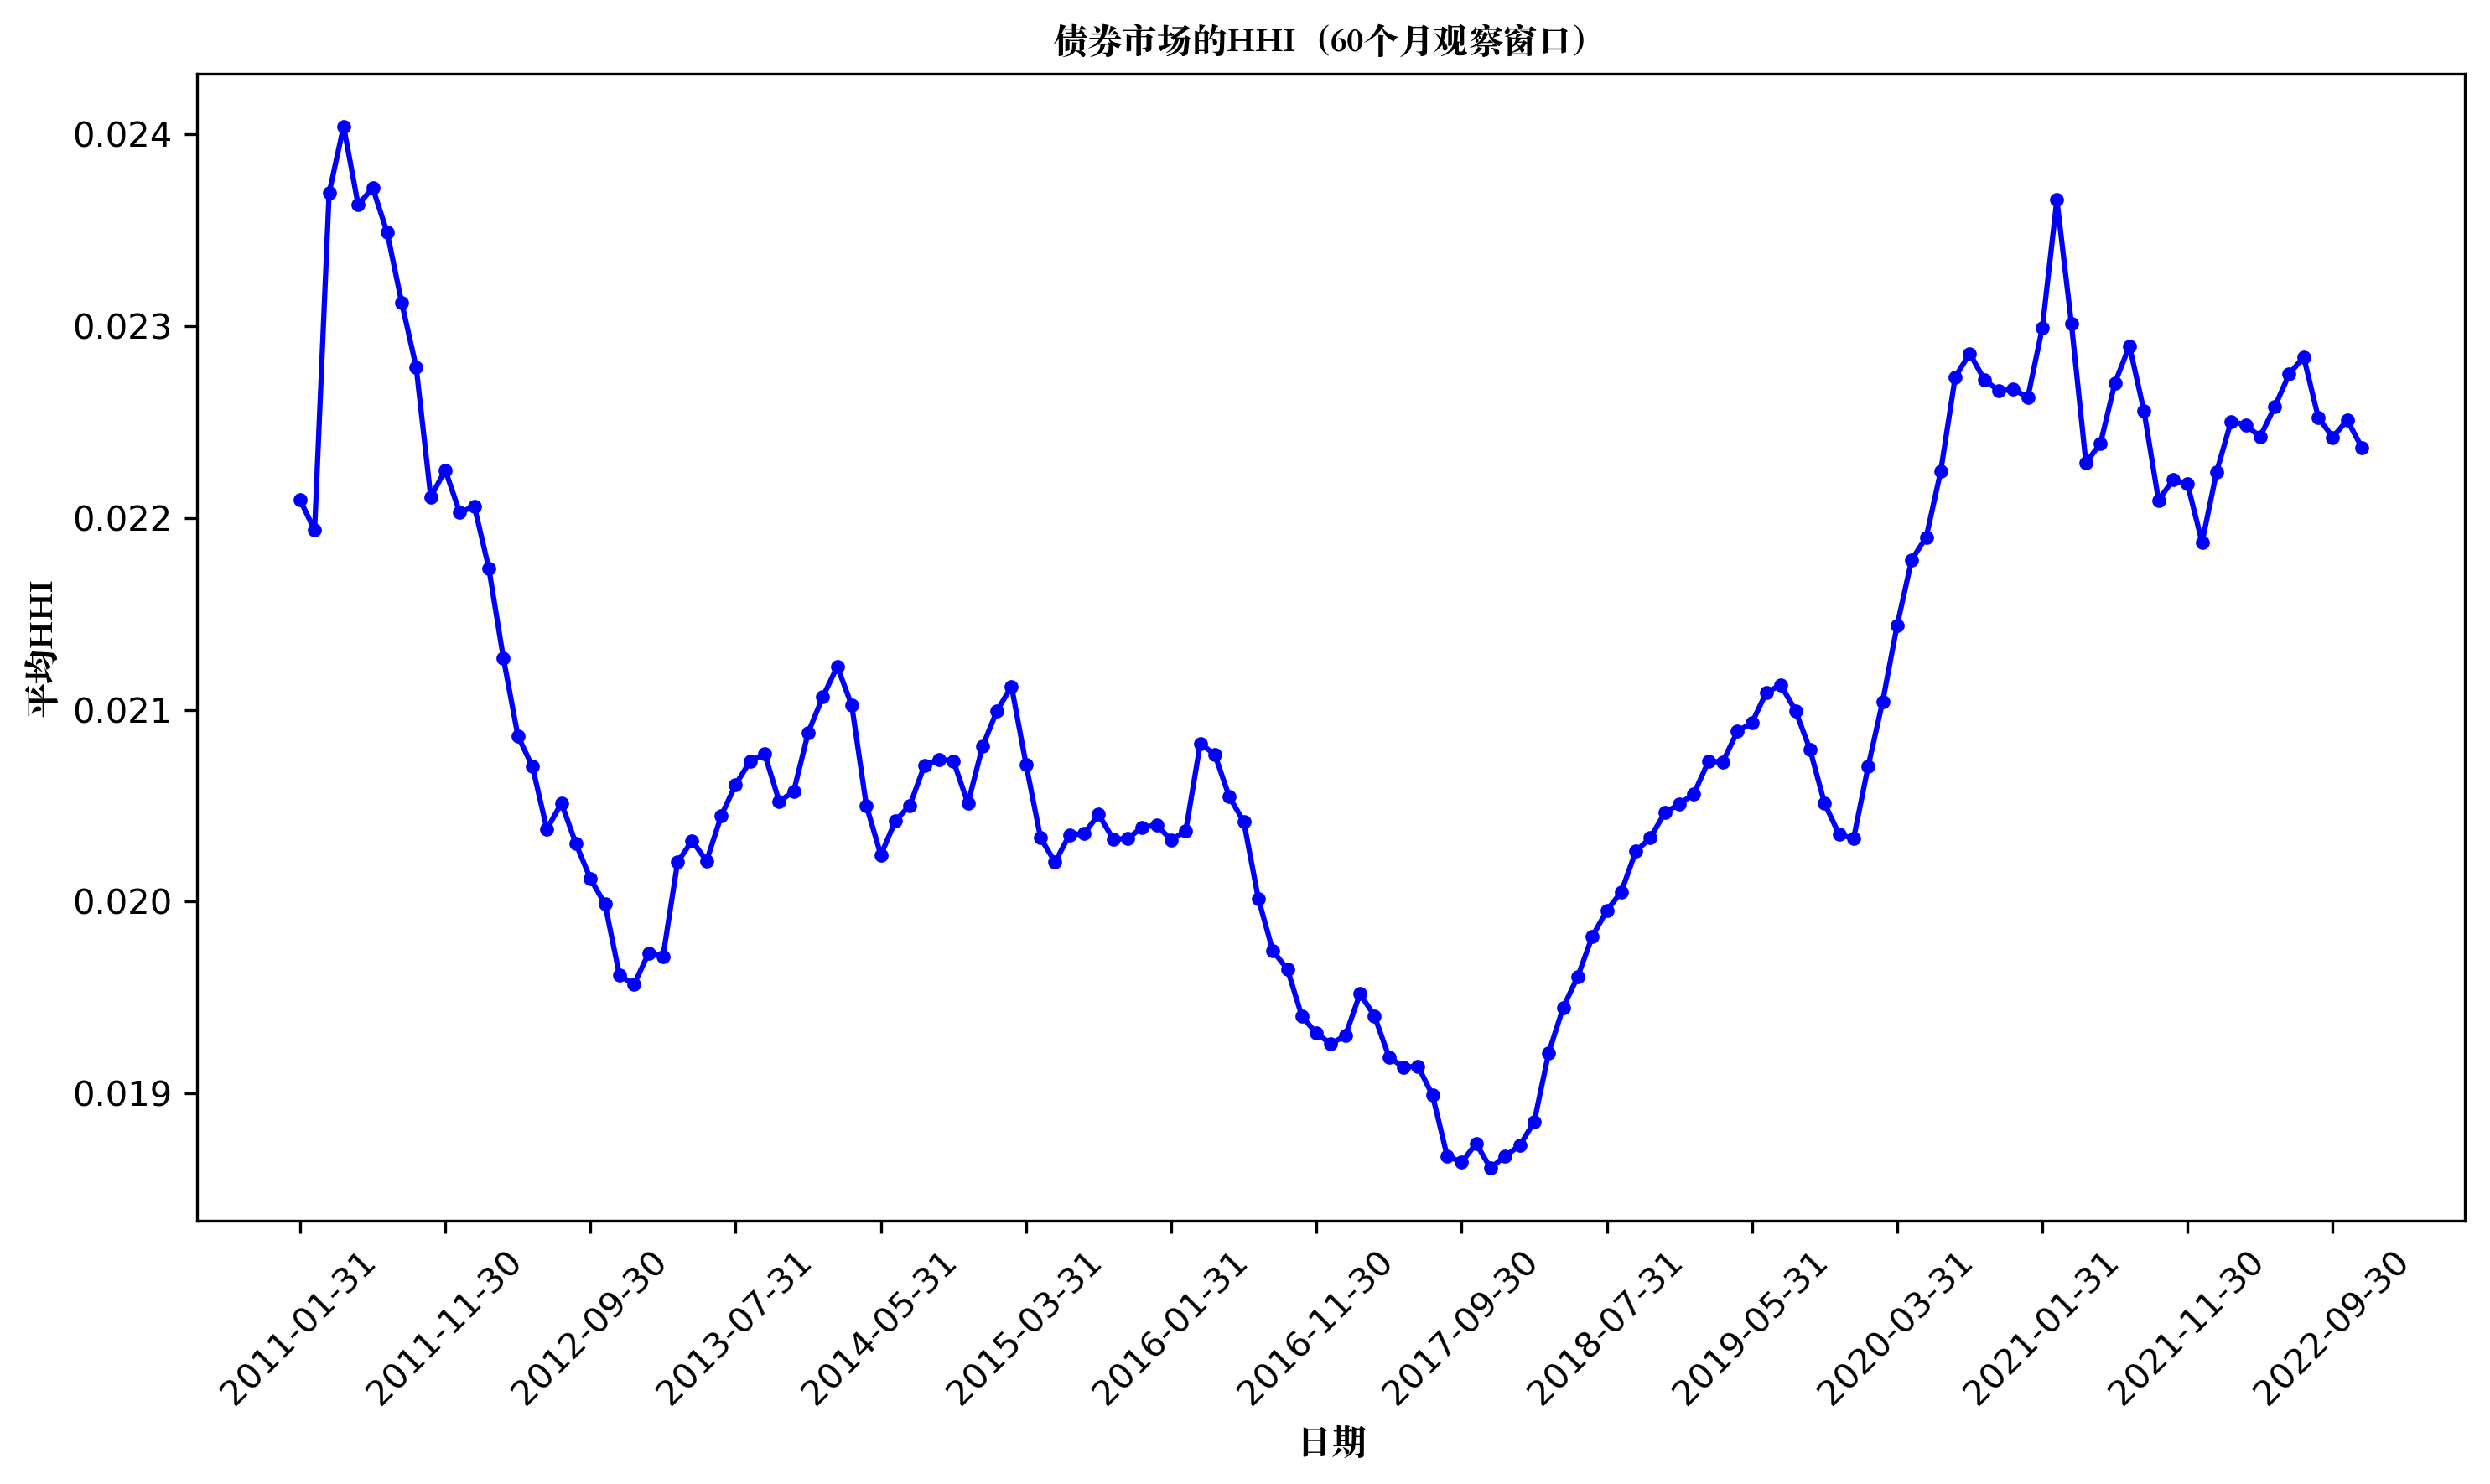

In [14]:
df_hhi = pd.read_csv('hhi_result_market_2011-01-31_2022-11-30_60.csv')

# 画图
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 设置中文字体
font_path = "Songti.ttc"  
my_font = font_manager.FontProperties(fname=font_path)

# 设置步长
step = 10  # 每隔10个日期显示一个标签

plt.figure(figsize=(10, 6), dpi=300)
plt.plot(df_hhi['Unnamed: 0'], df_hhi['market_hhi'], marker='o', linestyle='-', color='b', markersize=3)  # 调整点的大小
plt.title('债券市场的HHI（60个月观察窗口）', fontproperties=my_font)  # 使用中文字体
plt.xlabel('日期',fontproperties = my_font)
plt.ylabel('平均HHI',fontproperties = my_font)

# 只显示部分日期标签
plt.xticks(range(0, len(df_hhi['Unnamed: 0']), step), df_hhi['Unnamed: 0'][::step], rotation=45)

#plt.grid(True)
plt.tight_layout()
plt.show()

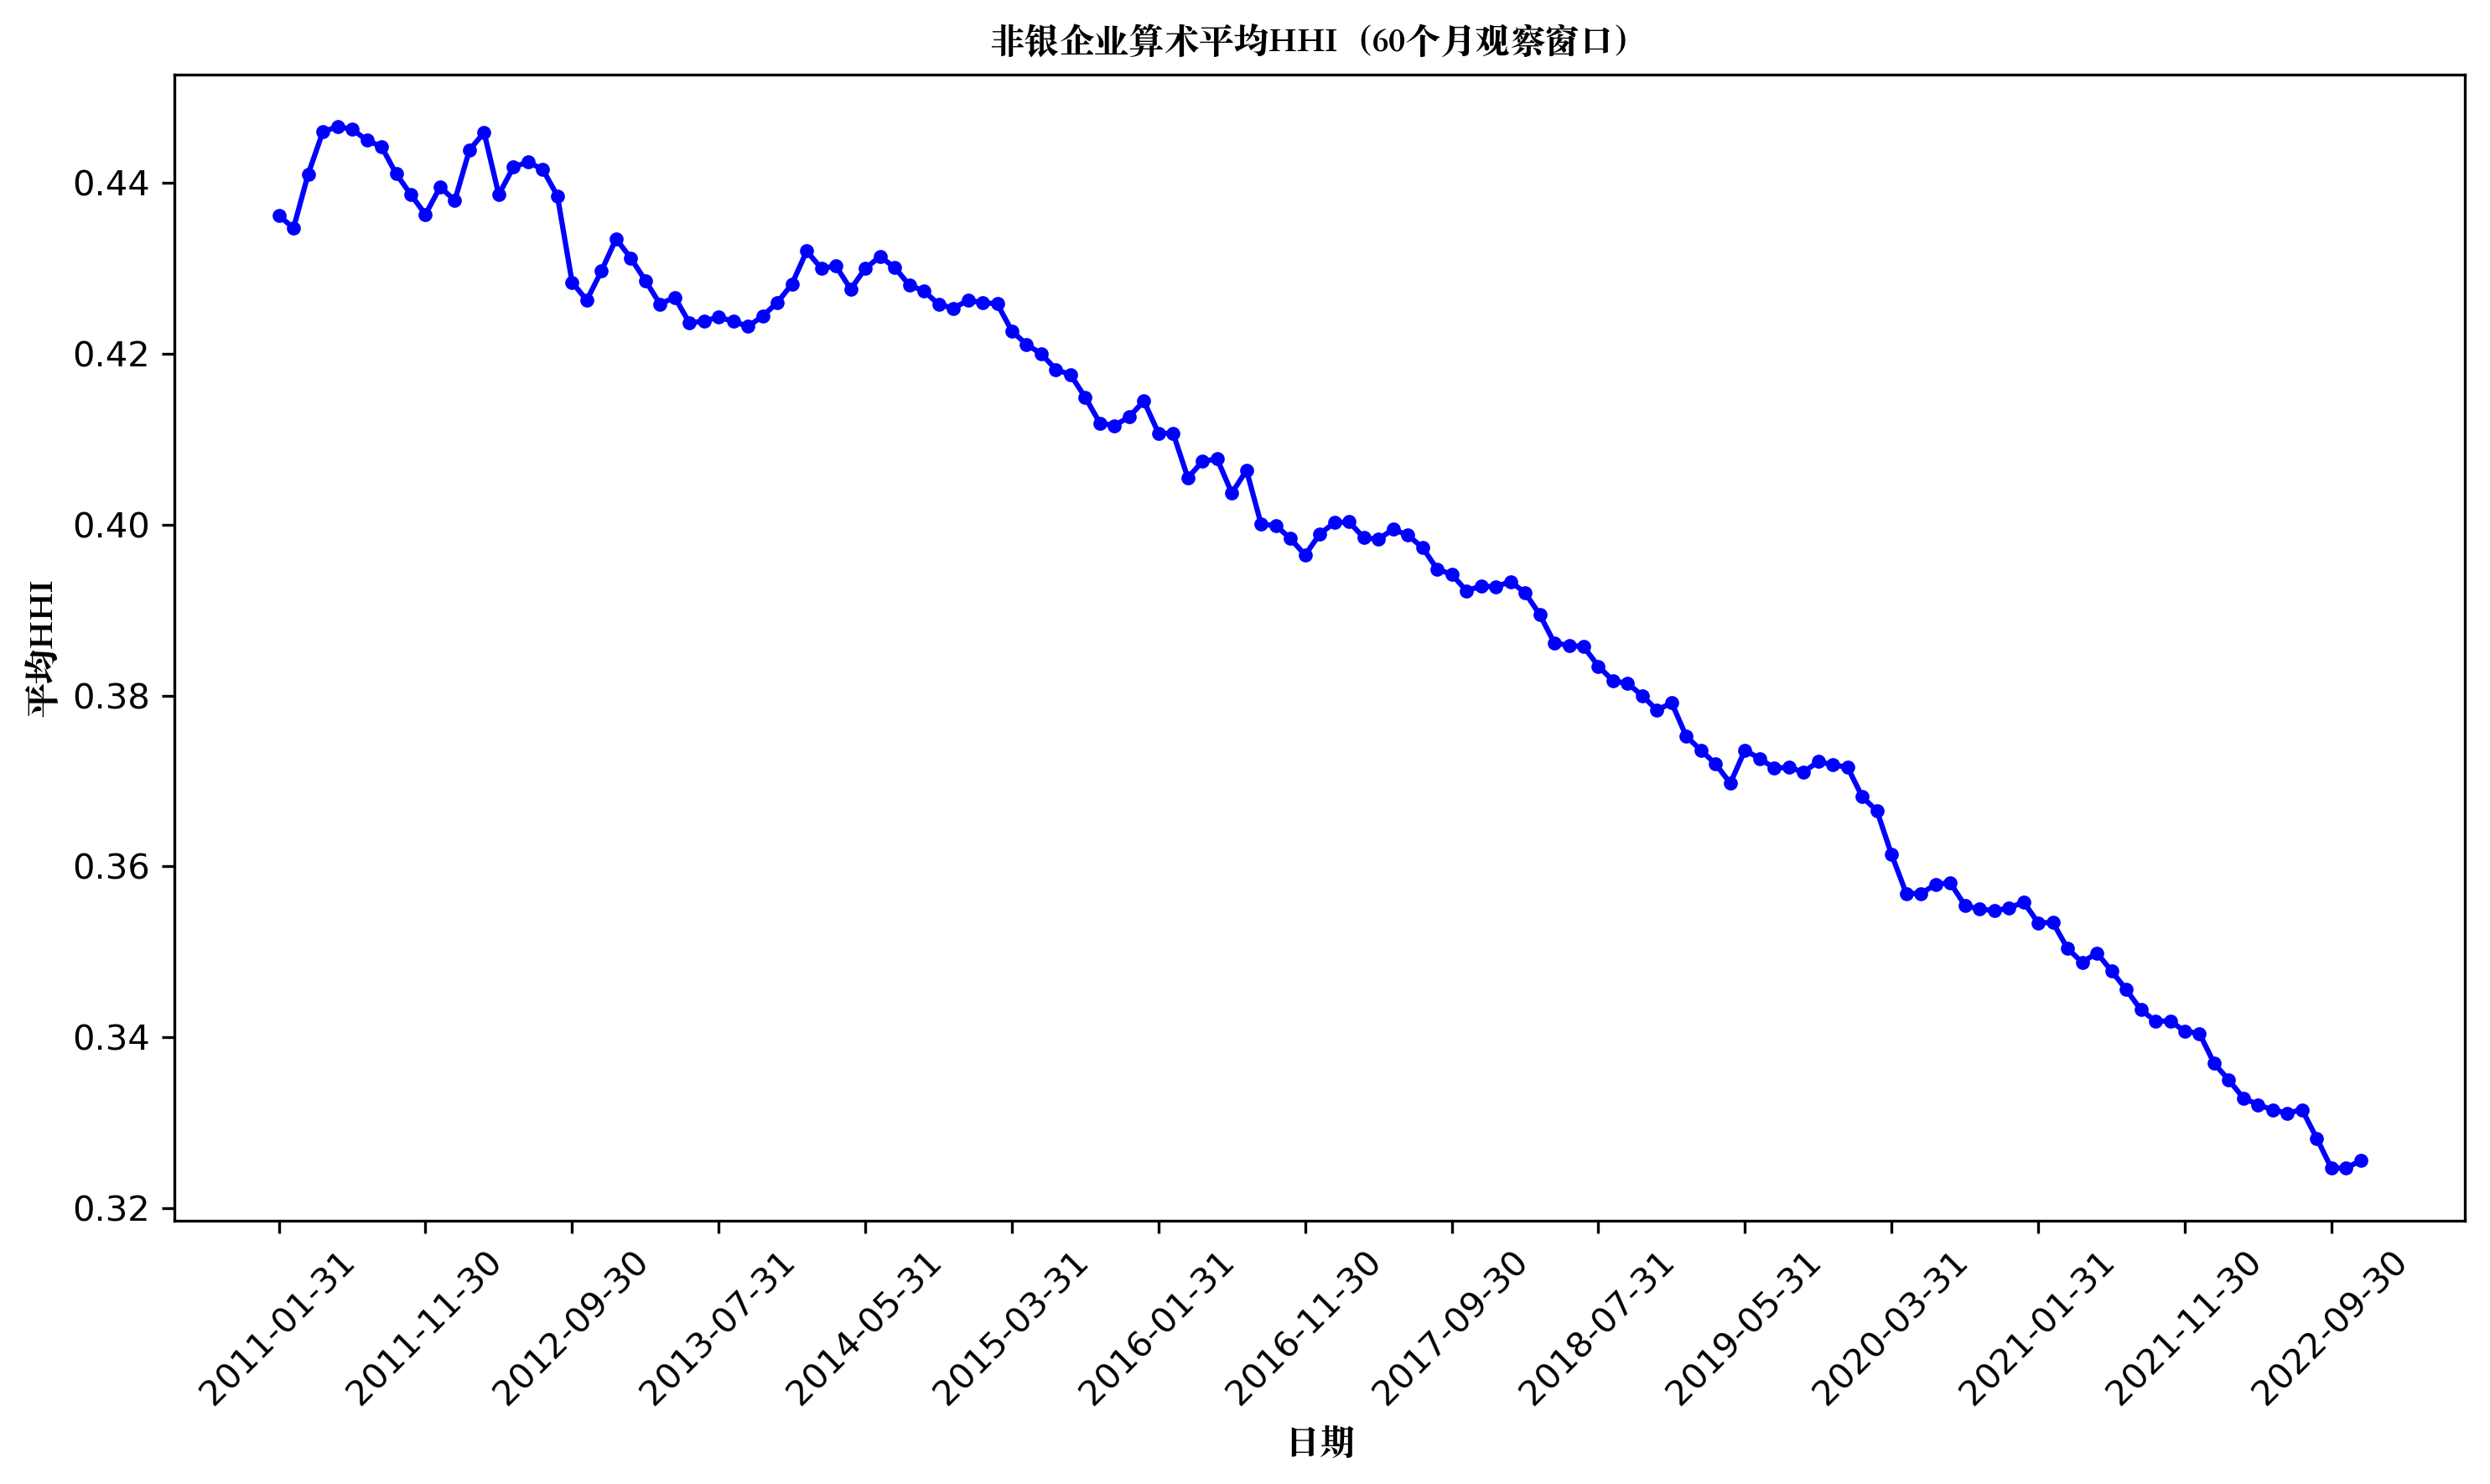

In [11]:
df_hhi = pd.read_csv('hhi_result_2011-01-31_2022-11-30_60_2.csv')

# 计算每个时间节点的平均HHI
df_hhi['mean_hhi'] = df_hhi.iloc[:, 2:].mask(df_hhi.iloc[:, 2:] == 1).mean(axis=1)
df_hhi.head()

import matplotlib.pyplot as plt
from matplotlib import font_manager

# 设置中文字体
font_path = "Songti.ttc"  
my_font = font_manager.FontProperties(fname=font_path)

# 设置步长
step = 10  # 每隔10个日期显示一个标签

plt.figure(figsize=(10, 6), dpi=300)
plt.plot(df_hhi['Unnamed: 0'], df_hhi['mean_hhi'], marker='o', linestyle='-', color='b', markersize=3)  # 调整点的大小
plt.title('非银企业算术平均HHI（60个月观察窗口）',fontproperties = my_font)
plt.xlabel('日期',fontproperties = my_font)
plt.ylabel('平均HHI',fontproperties = my_font)

# 只显示部分日期标签
plt.xticks(range(0, len(df_hhi['Unnamed: 0']), step), df_hhi['Unnamed: 0'][::step], rotation=45)

# plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:

pre = datetime.datetime(2011, 2, 28)
cur = pre + pd.offsets.MonthEnd(12)
cur


Timestamp('2012-02-29 00:00:00')

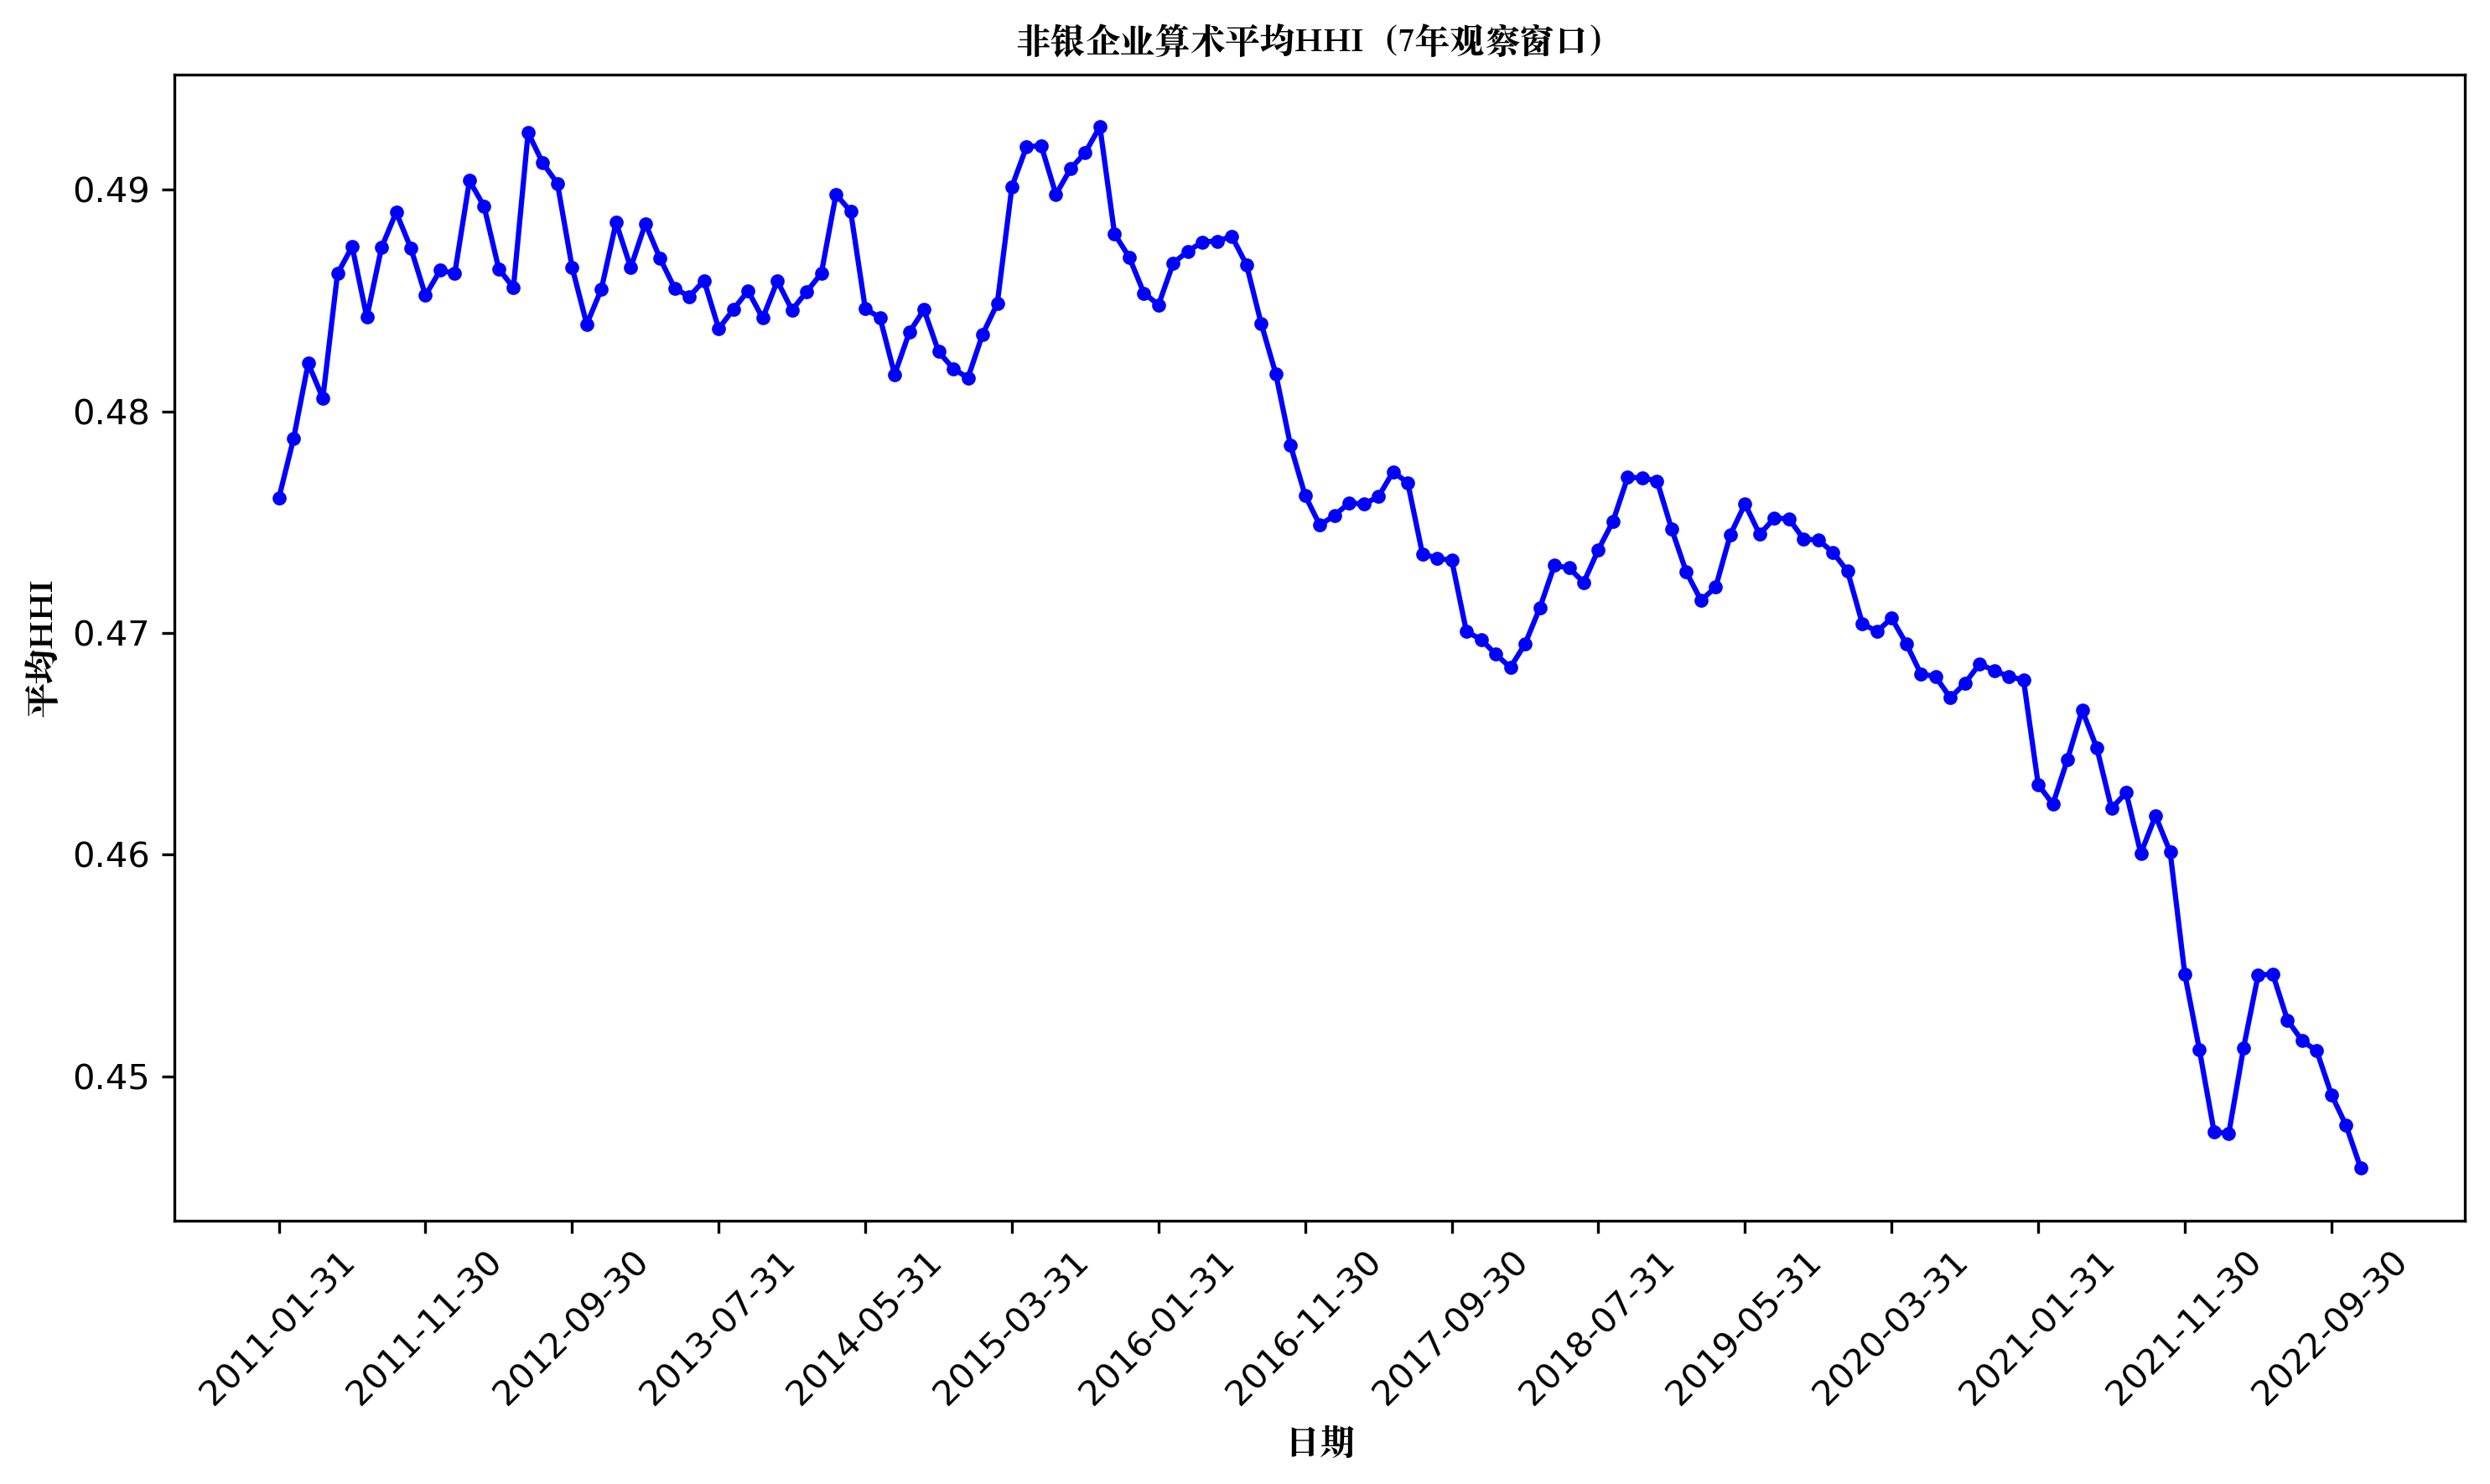

In [13]:
df_hhi = pd.read_csv('hhi_result_year_2011-01-31_2022-11-30_7.csv')

# 计算每个时间节点的平均HHI
# df_hhi['mean_hhi'] = df_hhi.iloc[:, 2:].mean(axis=1)
df_hhi['mean_hhi'] = df_hhi.iloc[:, 2:].mask(df_hhi.iloc[:, 2:] == 1).mean(axis=1)
df_hhi.head()
# 画图
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_path = 'Songti.ttc'
my_font = font_manager.FontProperties(fname=font_path)
# 设置步长
step = 10  # 每隔10个日期显示一个标签

plt.figure(figsize=(10, 6), dpi=300)
plt.plot(df_hhi['Unnamed: 0'], df_hhi['mean_hhi'], marker='o', linestyle='-', color='b', markersize=3)  # 调整点的大小
plt.title('非银企业算术平均HHI（7年观察窗口）',fontproperties = my_font)
plt.xlabel('日期',fontproperties = my_font)
plt.ylabel('平均HHI',fontproperties = my_font)

# 只显示部分日期标签
plt.xticks(range(0, len(df_hhi['Unnamed: 0']), step), df_hhi['Unnamed: 0'][::step], rotation=45)

#plt.grid(True)
plt.tight_layout()
plt.show()

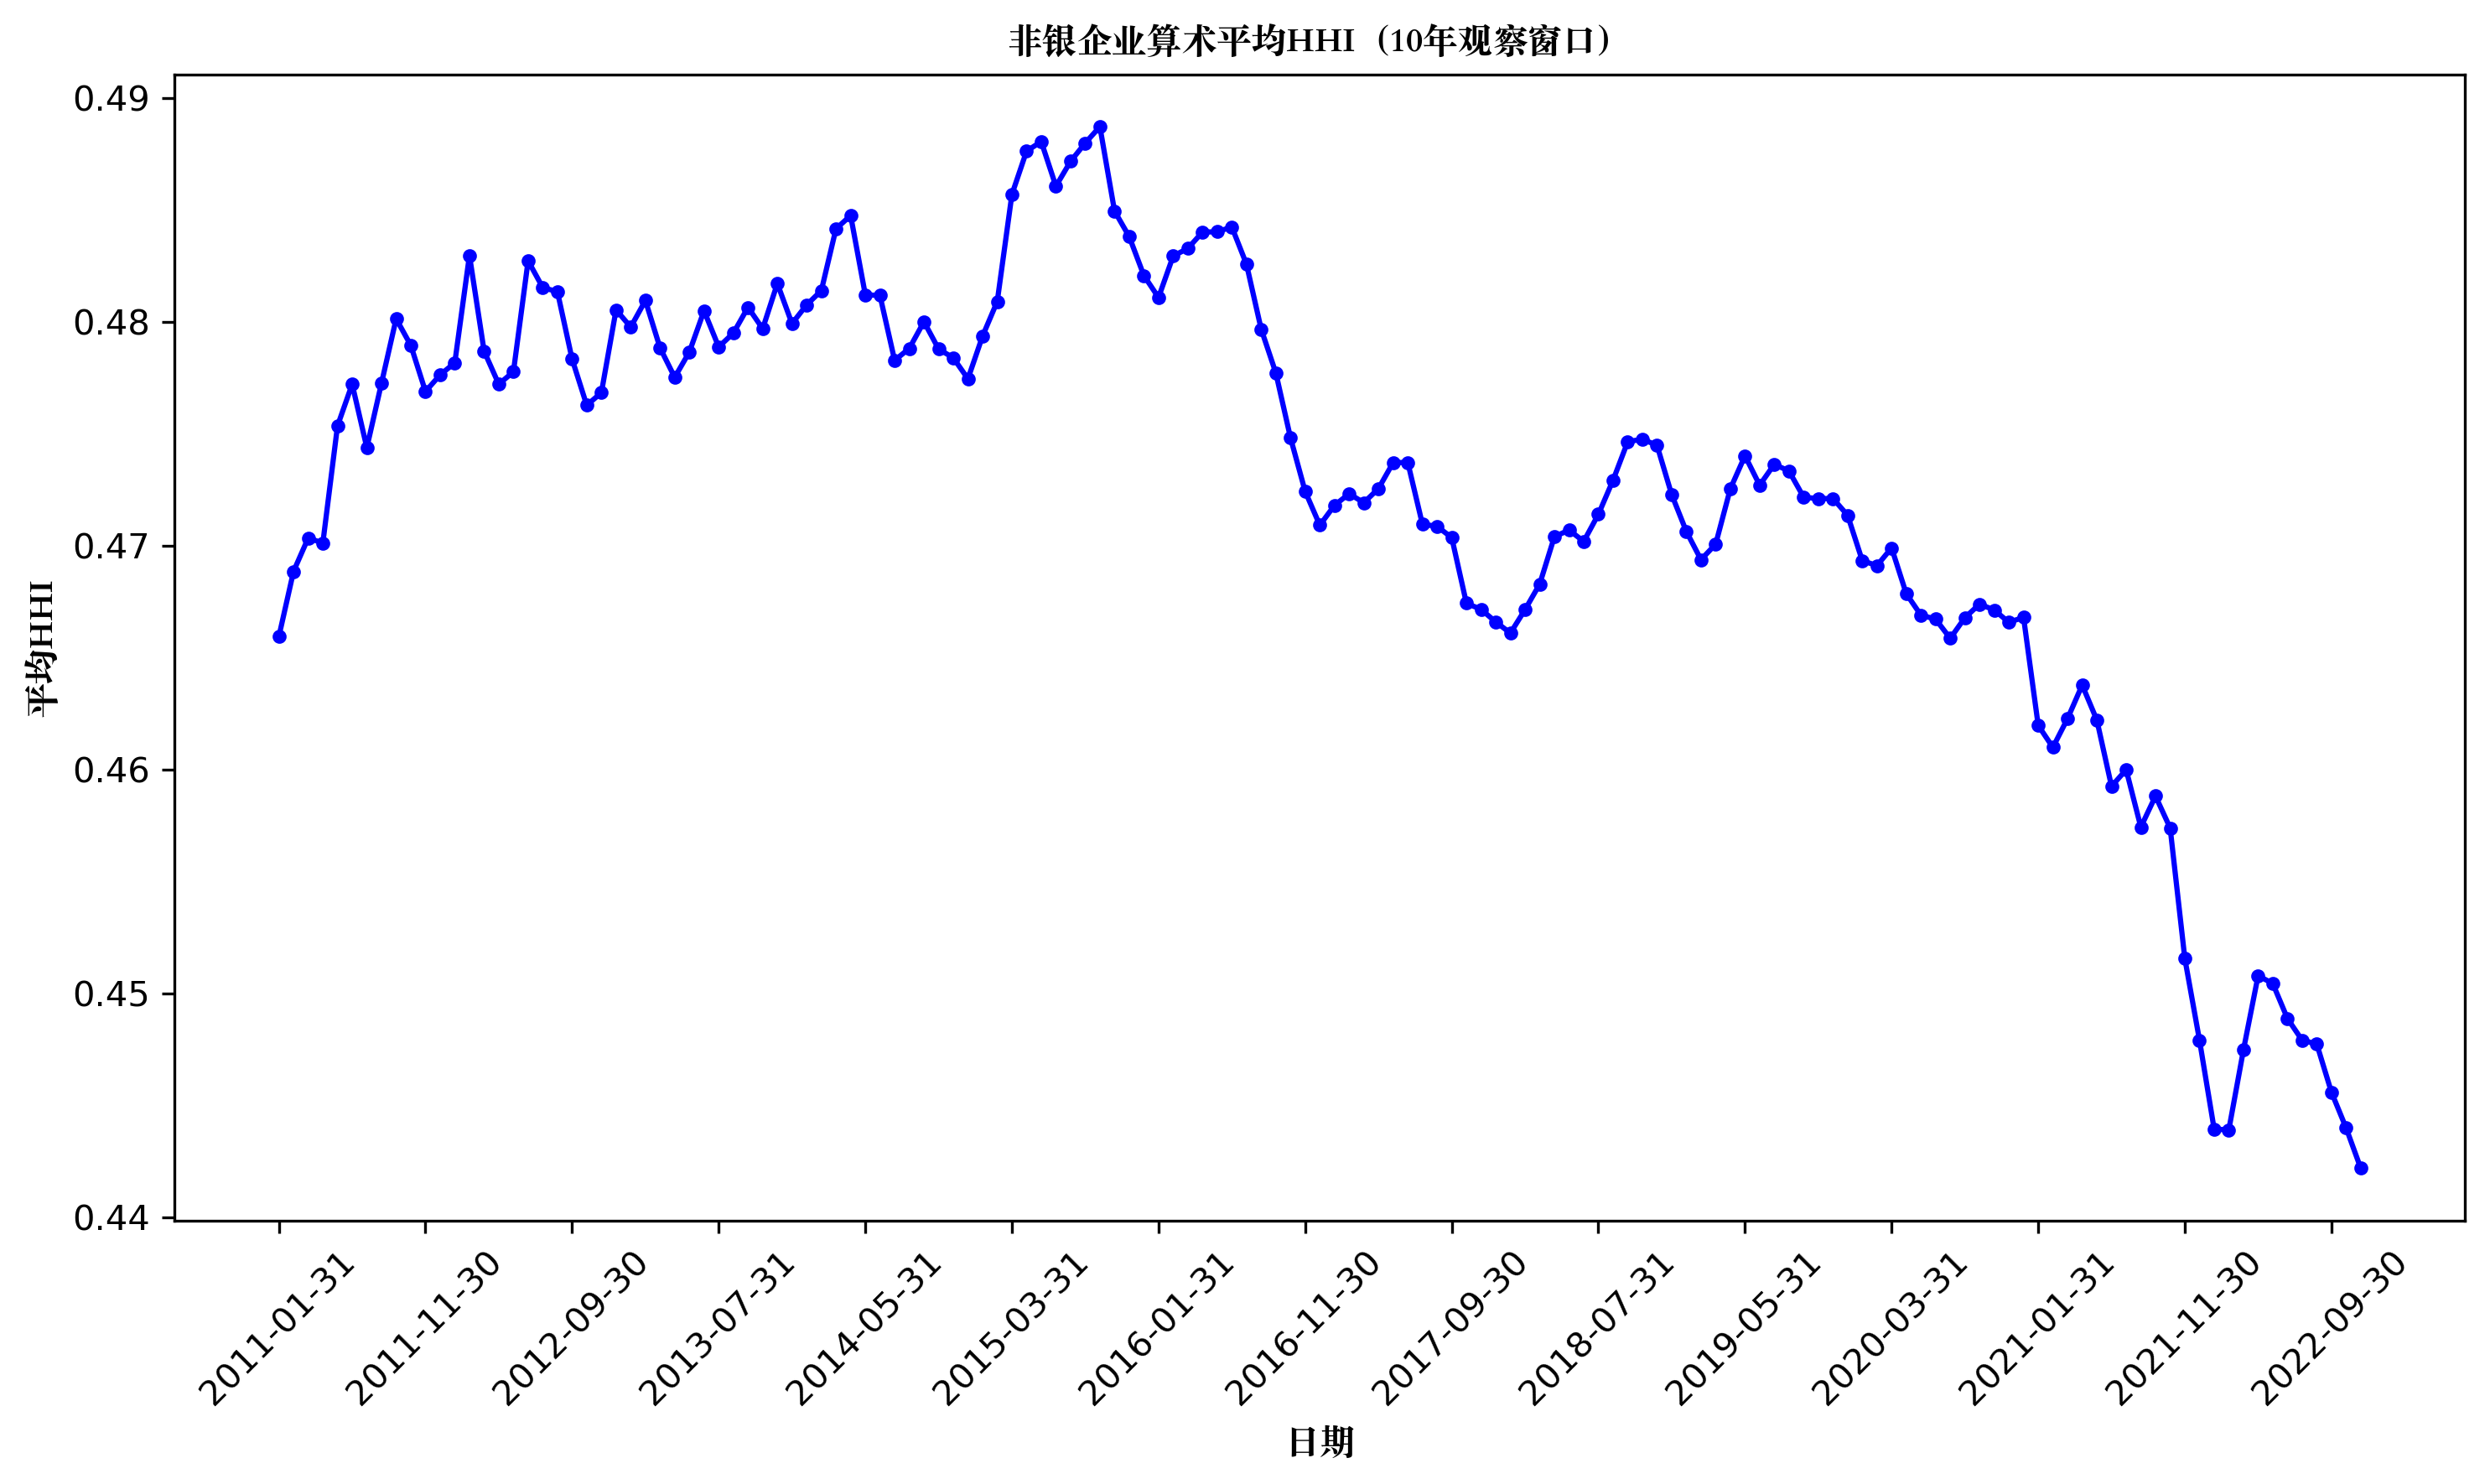

In [20]:
df_hhi = pd.read_csv('hhi_result_year_10_2011-01-31_2022-11-30_10.csv')

# 计算每个时间节点的平均HHI
# df_hhi['mean_hhi'] = df_hhi.iloc[:, 2:].mean(axis=1)
df_hhi['mean_hhi'] = df_hhi.iloc[:, 2:].mask(df_hhi.iloc[:, 2:] == 1).mean(axis=1)
df_hhi.head()
# 画图
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_path = 'Songti.ttc'
my_font = font_manager.FontProperties(fname=font_path)
# 设置步长
step = 10  # 每隔10个日期显示一个标签

plt.figure(figsize=(10, 6), dpi=300)
plt.plot(df_hhi['Unnamed: 0'], df_hhi['mean_hhi'], marker='o', linestyle='-', color='b', markersize=3)  # 调整点的大小
plt.title('非银企业算术平均HHI（10年观察窗口）',fontproperties = my_font)
plt.xlabel('日期',fontproperties = my_font)
plt.ylabel('平均HHI',fontproperties = my_font)

# 只显示部分日期标签
plt.xticks(range(0, len(df_hhi['Unnamed: 0']), step), df_hhi['Unnamed: 0'][::step], rotation=45)

#plt.grid(True)
plt.tight_layout()
plt.show()